In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
import warnings
warnings.filterwarnings("ignore")

In [ ]:
df=pd.read_csv("/content/Mall_Customers.csv")
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [ ]:
#Shape of dataset
df.shape

(200, 5)

In [ ]:
#Size of dataset
df.size

1000

In [ ]:
#Dimesnion of dataset
df.ndim

2

In [ ]:
#Info of dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


Text(0.5, 1.0, 'Distribution Plot of Age')

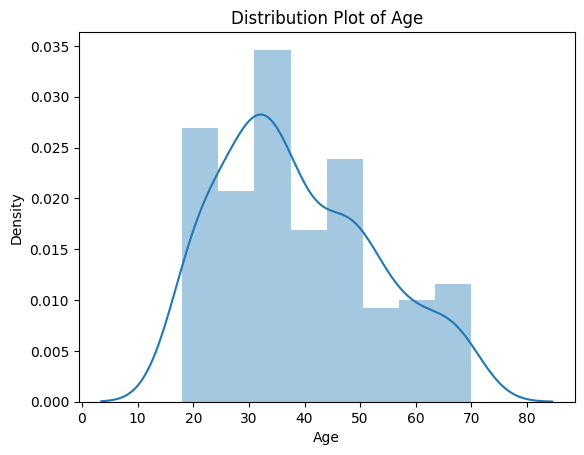

In [ ]:
sns.distplot(df['Age'],kde=True)
plt.title("Distribution Plot of Age")

Text(0.5, 1.0, 'Distribution Plot of Annual Income (in K$)')

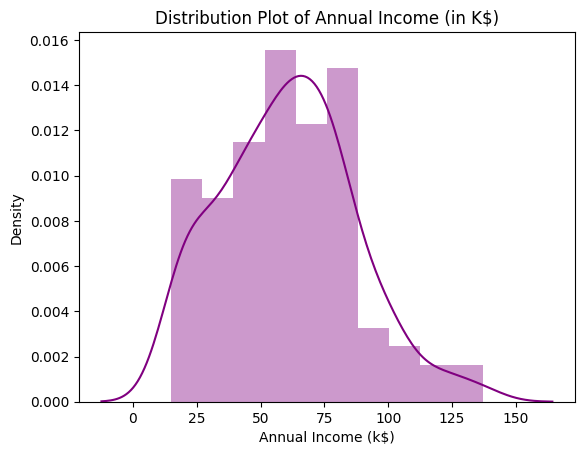

In [ ]:
sns.distplot(df['Annual Income (k$)'],kde=True,color='purple')
plt.title("Distribution Plot of Annual Income (in K$)")

Text(0.5, 1.0, 'Distribution Plot of Spending Score (1-100)')

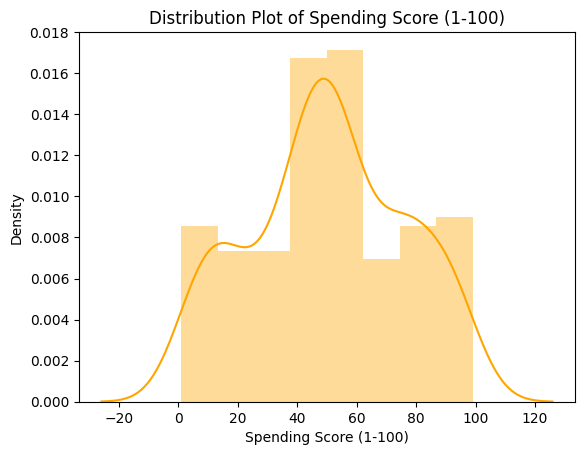

In [ ]:
sns.distplot(df['Spending Score (1-100)'],kde=True,color='orange')
plt.title("Distribution Plot of Spending Score (1-100)")

Text(0.5, 1.0, 'Countplot of Gender')

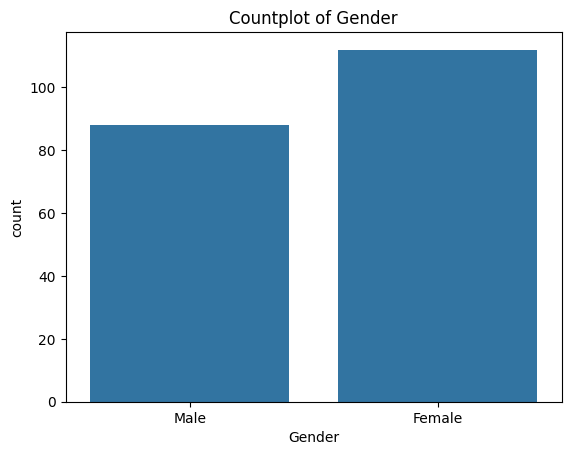

In [ ]:
sns.countplot(data=df,x='Gender')
plt.title("Countplot of Gender")

[Text(0.5, 1.0, 'Boxplot for Spending Score')]

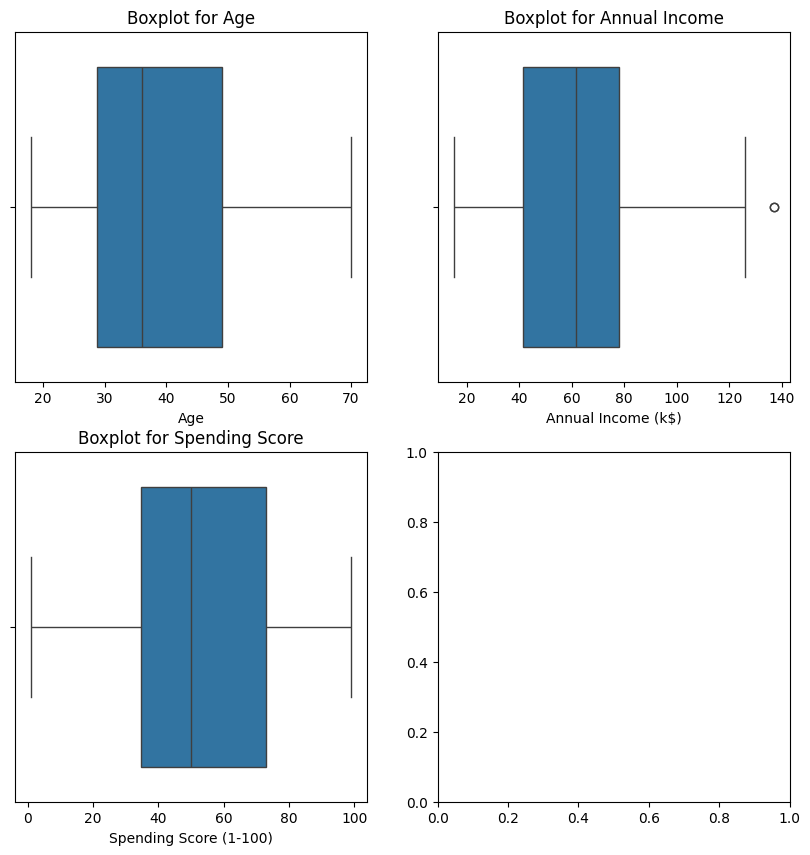

In [ ]:
fig, axes = plt.subplots(2, 2, figsize=(10, 10))

sns.boxplot(x=df['Age'], ax=axes[0,0]).set(title='Boxplot for Age')
sns.boxplot(x=df['Annual Income (k$)'], ax=axes[0,1]).set(title='Boxplot for Annual Income')
sns.boxplot(x=df['Spending Score (1-100)'], ax=axes[1,0]).set(title='Boxplot for Spending Score')

Text(0, 0.5, 'Number of Customers')

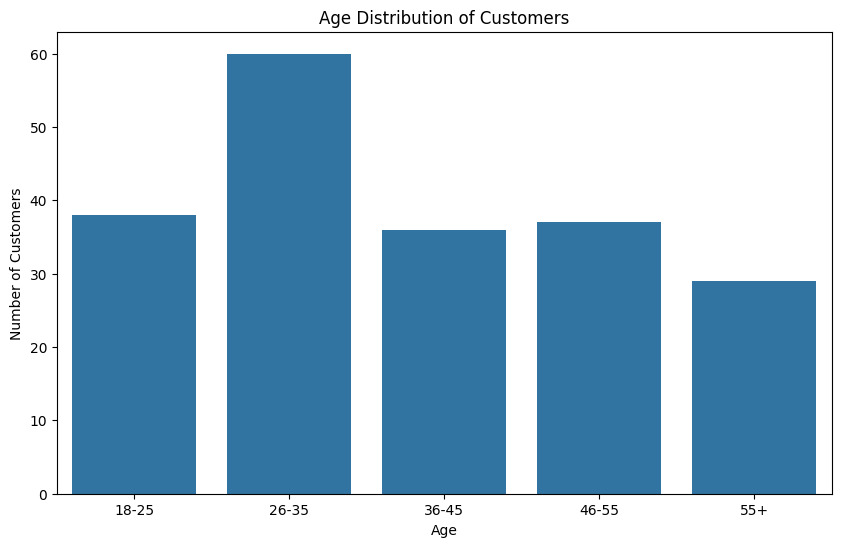

In [ ]:
#Age Distribution of Customers
age_18_25=df.Age[(df.Age>=18) & (df.Age<=25)]
age_26_35=df.Age[(df.Age>=26) & (df.Age<=35)]
age_36_45=df.Age[(df.Age>=36) & (df.Age<=45)]
age_46_55=df.Age[(df.Age>=46) & (df.Age<=55)]
age_55above=df.Age[(df.Age>=56)]

agex=["18-25","26-35","36-45","46-55","55+"]
agey=[len(age_18_25.values),len(age_26_35.values),len(age_36_45.values),len(age_46_55.values),len(age_55above.values)]

plt.figure(figsize=(10,6))
sns.barplot(x=agex,y=agey)
plt.title("Age Distribution of Customers")
plt.xlabel("Age")
plt.ylabel("Number of Customers")

Text(0, 0.5, 'Number of Customers')

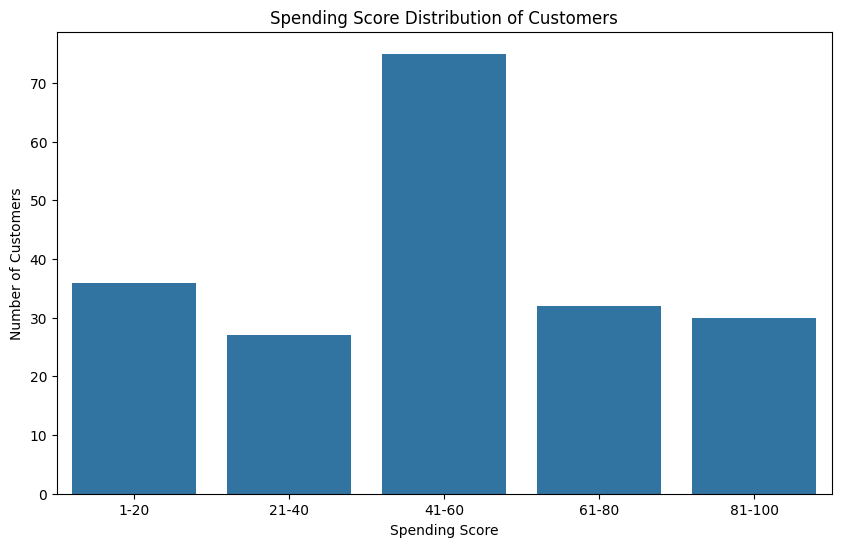

In [ ]:
#Spending Score Distribution of Customers
ss_1_20=df["Spending Score (1-100)"][(df["Spending Score (1-100)"]>=1) & (df["Spending Score (1-100)"]<=20)]
ss_21_40=df["Spending Score (1-100)"][(df["Spending Score (1-100)"]>=21) & (df["Spending Score (1-100)"]<=40)]
ss_41_60=df["Spending Score (1-100)"][(df["Spending Score (1-100)"]>=41) & (df["Spending Score (1-100)"]<=60)]
ss_61_80=df["Spending Score (1-100)"][(df["Spending Score (1-100)"]>=61) & (df["Spending Score (1-100)"]<=80)]
ss_81_100=df["Spending Score (1-100)"][(df["Spending Score (1-100)"]>=81) & (df["Spending Score (1-100)"]<=100)]

ssx=["1-20","21-40","41-60","61-80","81-100"]
ssy=[len(ss_1_20.values),len(ss_21_40.values),len(ss_41_60.values),len(ss_61_80.values),len(ss_81_100.values)]

plt.figure(figsize=(10,6))
sns.barplot(x=ssx,y=ssy)
plt.title("Spending Score Distribution of Customers")
plt.xlabel("Spending Score")
plt.ylabel("Number of Customers")

Text(0, 0.5, 'Number of Customers')

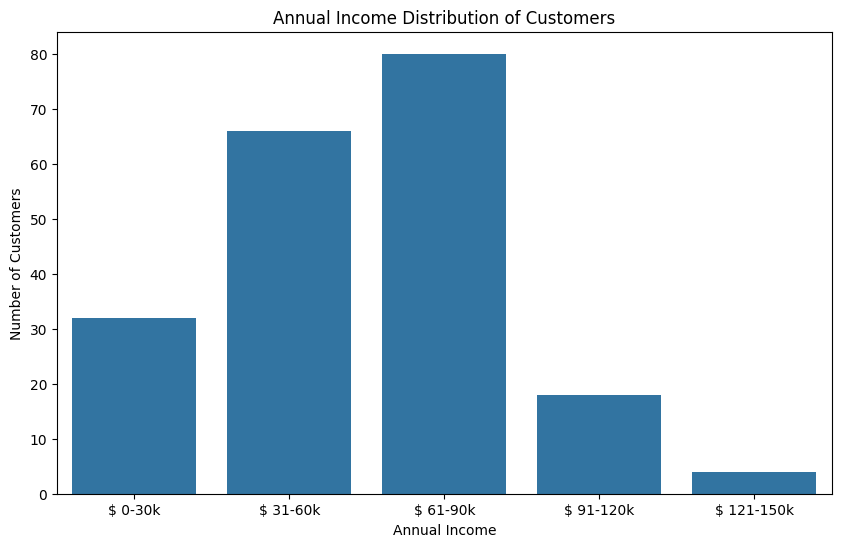

In [ ]:
#Annual Income Distribution of Customers
ai_0_30=df["Annual Income (k$)"][(df["Annual Income (k$)"]>=0) & (df["Annual Income (k$)"]<=30)]
ai_31_60=df["Annual Income (k$)"][(df["Annual Income (k$)"]>=31) & (df["Annual Income (k$)"]<=60)]
ai_61_90=df["Annual Income (k$)"][(df["Annual Income (k$)"]>=61) & (df["Annual Income (k$)"]<=90)]
ai_91_120=df["Annual Income (k$)"][(df["Annual Income (k$)"]>=91) & (df["Annual Income (k$)"]<=120)]
ai_121_150=df["Annual Income (k$)"][(df["Annual Income (k$)"]>=121) & (df["Annual Income (k$)"]<=150)]

aix=["$ 0-30k","$ 31-60k","$ 61-90k","$ 91-120k","$ 121-150k"]
aiy=[len(ai_0_30.values),len(ai_31_60.values),len(ai_61_90.values),len(ai_91_120.values),len(ai_121_150.values)]

plt.figure(figsize=(10,6))
sns.barplot(x=aix,y=aiy)
plt.title("Annual Income Distribution of Customers")
plt.xlabel("Annual Income")
plt.ylabel("Number of Customers")

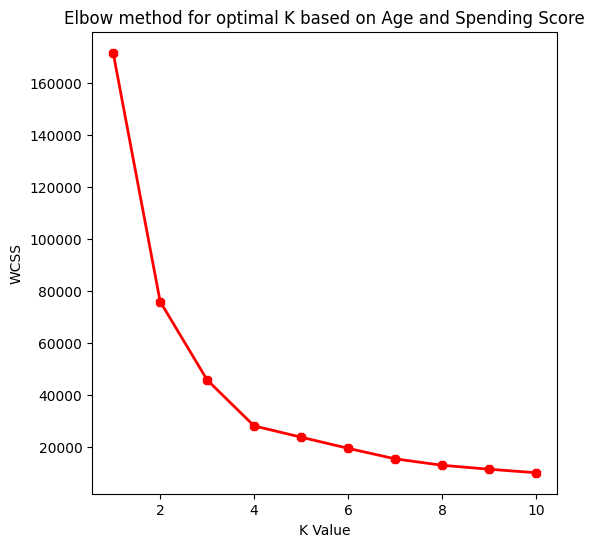

In [ ]:
#Calculating optimal number of clusters for a combination of Age and Spending Score using Sum of Squares Method
x1=df.loc[::,["Age","Spending Score (1-100)"]].values
from sklearn.cluster import KMeans
wcss=[]
for k in range(1,11):
    kmeans=KMeans(n_clusters=k,init="k-means++")
    kmeans.fit(x1)
    wcss.append(kmeans.inertia_)
plt.figure(figsize=(6,6))
plt.plot(range(1,11),wcss,linewidth=2,color='red',marker="8")
plt.xlabel("K Value")
plt.ylabel("WCSS")
plt.title("Elbow method for optimal K based on Age and Spending Score")
plt.show()

In [ ]:
#Printing Clusters and their Centroid for k=4
kmeans=KMeans(n_clusters=4)
clusters=kmeans.fit_predict(x1)
print("Clusters")
print(clusters)
print("-----------------------------------------------------")
print("Cluster Centroids")
print(kmeans.cluster_centers_)

Clusters
[3 0 1 0 3 0 1 0 1 0 1 0 1 0 1 0 3 3 1 0 3 0 1 0 1 0 1 3 1 0 1 0 1 0 1 0 1
 0 1 0 2 0 2 3 1 3 2 3 3 3 2 3 3 2 2 2 2 2 3 2 2 3 2 2 2 3 2 2 3 3 2 2 2 2
 2 3 2 3 3 2 2 3 2 2 3 2 2 3 3 2 2 3 2 3 3 3 2 3 2 3 3 2 2 3 2 3 2 2 2 2 2
 3 3 3 3 3 2 2 2 2 3 3 3 0 3 0 2 0 1 0 1 0 3 0 1 0 1 0 1 0 1 0 3 0 1 0 2 0
 1 0 1 0 1 0 1 0 1 0 1 0 2 0 1 0 1 0 1 0 1 3 1 0 1 0 1 0 1 0 1 0 1 0 1 0 3
 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0]
-----------------------------------------------------
Cluster Centroids
[[30.1754386  82.35087719]
 [43.29166667 15.02083333]
 [55.70833333 48.22916667]
 [27.61702128 49.14893617]]


Text(0, 0.5, 'Spending Score')

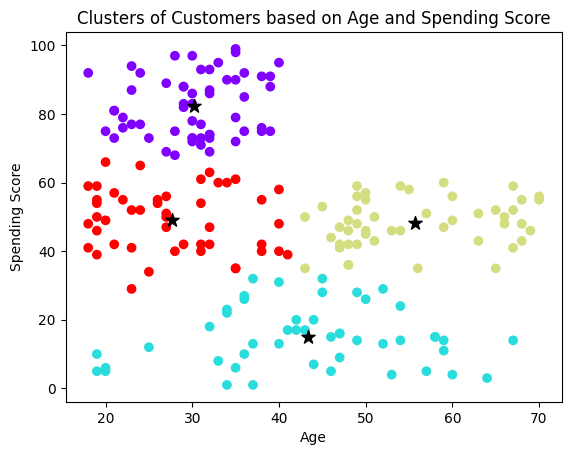

In [ ]:
#Clusters of Customers based on Age and Spending Score
plt.scatter(x1[:,0],x1[:,1],c=kmeans.labels_,cmap='rainbow')
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],color="black",marker="*",s=100)
plt.title("Clusters of Customers based on Age and Spending Score")
plt.xlabel("Age")
plt.ylabel("Spending Score")

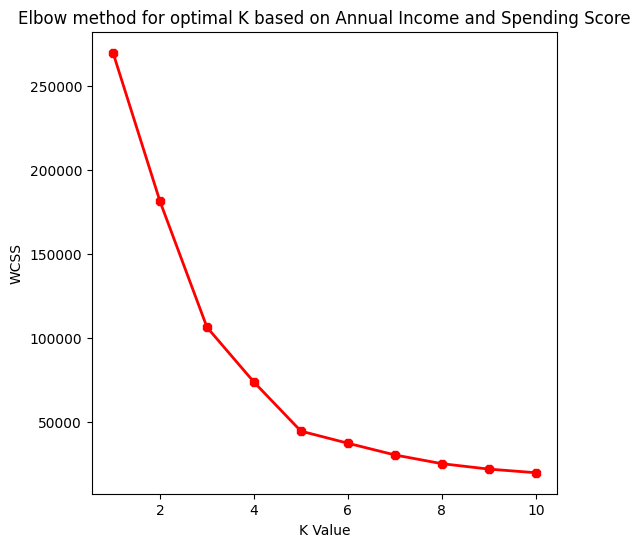

In [ ]:
#Calculating optimal number of clusters for a combination of Annual Income and Spending Score using Sum of Squares Method
x2=df.loc[::,["Annual Income (k$)","Spending Score (1-100)"]].values
from sklearn.cluster import KMeans
wcss=[]
for k in range(1,11):
    kmeans=KMeans(n_clusters=k,init="k-means++")
    kmeans.fit(x2)
    wcss.append(kmeans.inertia_)
plt.figure(figsize=(6,6))
plt.plot(range(1,11),wcss,linewidth=2,color='red',marker="8")
plt.xlabel("K Value")
plt.ylabel("WCSS")
plt.title("Elbow method for optimal K based on Annual Income and Spending Score")
plt.show()

In [ ]:
#Printing Clusters and their Centroid for k=5
kmeans=KMeans(n_clusters=5)
clusters=kmeans.fit_predict(x2)
print("Clusters")
print(clusters)
print("-----------------------------------------------------")
print("Cluster Centers")
print(kmeans.cluster_centers_)

Clusters
[2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2
 3 2 3 2 3 2 1 2 3 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 4 0 4 1 4 0 4 0 4 1 4 0 4 0 4 0 4 0 4 1 4 0 4 0 4
 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0
 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4]
-----------------------------------------------------
Cluster Centers
[[88.2        17.11428571]
 [55.2962963  49.51851852]
 [26.30434783 20.91304348]
 [25.72727273 79.36363636]
 [86.53846154 82.12820513]]


Text(0, 0.5, 'Spending Score')

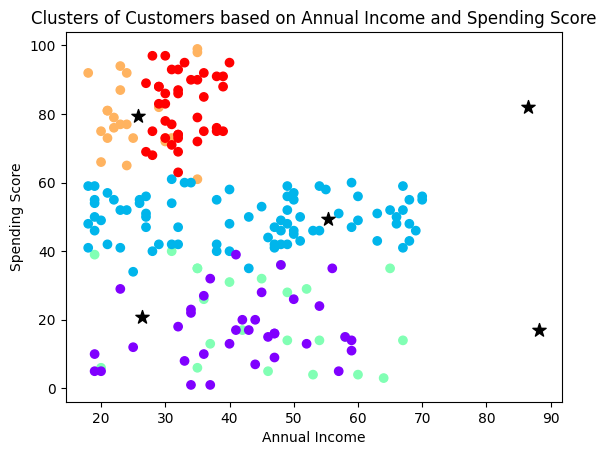

In [ ]:
#Clusters of Customers based on Annual Income and Spending Score
plt.scatter(x1[:,0],x1[:,1],c=kmeans.labels_,cmap='rainbow')
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],color="black",marker="*",s=100)
plt.title("Clusters of Customers based on Annual Income and Spending Score")
plt.xlabel("Annual Income")
plt.ylabel("Spending Score")

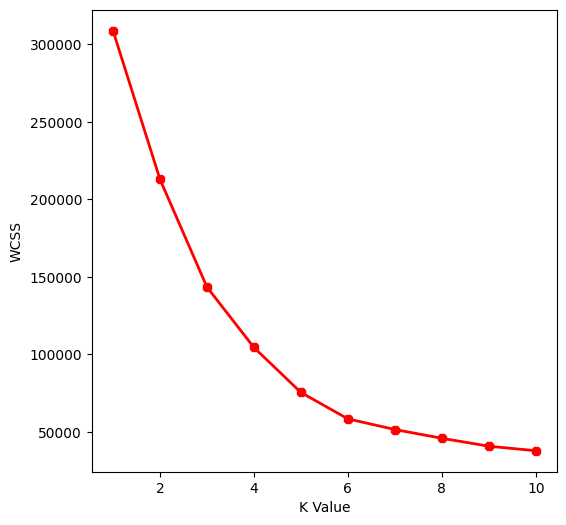

In [ ]:
#Calculating optimal number of clusters for a combination of Age, Annual Income and Spending Score using Sum of Squares Method
x3=df.loc[::,["Age","Annual Income (k$)","Spending Score (1-100)"]].values
from sklearn.cluster import KMeans
wcss=[]
for k in range(1,11):
    kmeans=KMeans(n_clusters=k,init="k-means++")
    kmeans.fit(x3)
    wcss.append(kmeans.inertia_)
plt.figure(figsize=(6,6))
plt.plot(range(1,11),wcss,linewidth=2,color='red',marker="8")
plt.xlabel("K Value")
plt.ylabel("WCSS")
plt.show()

In [ ]:
#Printing Clusters and their Centroid for k=5
kmeans=KMeans(n_clusters=5)
clusters=kmeans.fit_predict(x3)
print("Clusters")
print(clusters)
print("-------------------------------------")
print("Cluster Centers")
print(kmeans.cluster_centers_)

Clusters
[4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4
 2 4 2 4 2 4 2 4 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 0 3 0 1 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 1 0 3 0 3 0
 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3
 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0]
-------------------------------------
Cluster Centers
[[32.69230769 86.53846154 82.12820513]
 [43.08860759 55.29113924 49.56962025]
 [25.52173913 26.30434783 78.56521739]
 [40.66666667 87.75       17.58333333]
 [45.2173913  26.30434783 20.91304348]]


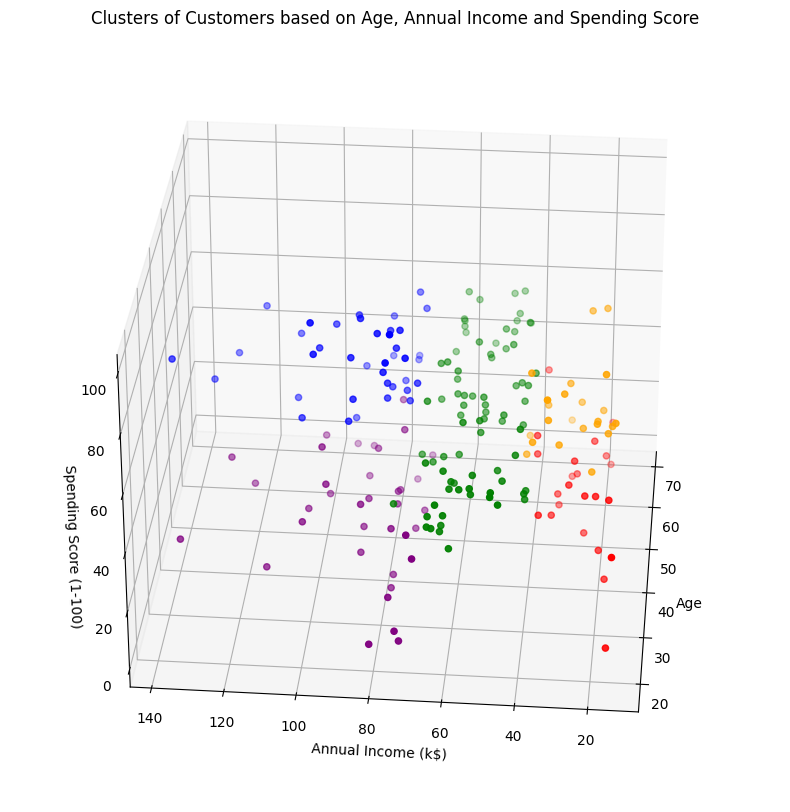

In [ ]:
df['label']=clusters

from mpl_toolkits.mplot3d import Axes3D

fig=plt.figure(figsize=(10,10))
ax=fig.add_subplot(111,projection='3d')

ax.scatter(df.Age[df.label==0],df["Annual Income (k$)"][df.label==0],df["Spending Score (1-100)"][df.label==0],c='blue')
ax.scatter(df.Age[df.label==1],df["Annual Income (k$)"][df.label==1],df["Spending Score (1-100)"][df.label==1],c='green')
ax.scatter(df.Age[df.label==2],df["Annual Income (k$)"][df.label==2],df["Spending Score (1-100)"][df.label==2],c='orange')
ax.scatter(df.Age[df.label==3],df["Annual Income (k$)"][df.label==3],df["Spending Score (1-100)"][df.label==3],c='purple')
ax.scatter(df.Age[df.label==4],df["Annual Income (k$)"][df.label==4],df["Spending Score (1-100)"][df.label==4],c='red')
ax.view_init(30,185)

plt.xlabel("Age")
plt.ylabel("Annual Income (k$)")
ax.set_zlabel("Spending Score (1-100)")
plt.title("Clusters of Customers based on Age, Annual Income and Spending Score")
plt.show()